### Step 1: Import necessary libraries



In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data with pandas 

In [95]:
df = pd.read_csv("housing_Full.csv")

In [96]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [97]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


#### Checking the shape of the dataset

In [98]:
df.shape

(34857, 21)

##### Checking the whole information of data including data types

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

##### Checking the missing values in the data 

In [100]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

###### Checking the percentage of missing values per column

In [101]:
missing_values_percent = df.isnull().sum() * 100 / len(df)

In [102]:
missing_values_percent

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

### Insights from missing values calculations
#### The columns BuildingArea and YearBuilt having more than 50% missing values in the column. We cannot remove the whole columns because we can loose a lot of data So we fill it with the appropriate values or methods

#### Removing rows with missing 'Price' values

In [103]:
df = df.dropna(subset=['Price'])

In [104]:
df['Price'].isnull().sum()

0

In [105]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())

In [106]:
df = df.dropna(subset=[ 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'])


#### Performing descriptive statistics to summarize the data

In [107]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,17960.000000,1.796000e+04,17960.000000,17960.000000,17954.000000,17951.000000,17679.000000,17960.000000,17960.000000,17960.000000,17960.000000,17960.000000,17960.000000
mean,3.050056,1.096336e+06,11.108558,3112.002394,3.033085,1.580413,1.698739,593.748719,156.683404,1967.187082,-37.806490,144.995942,7475.090757
std,0.942527,6.536700e+05,6.670337,109.431463,0.954672,0.702866,0.999023,3759.538783,345.109054,28.524146,0.089034,0.116992,4389.346533
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.600000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,129.000000,1960.000000,-37.858900,144.925300,4380.000000
50%,3.000000,9.180000e+05,10.300000,3085.000000,3.000000,1.000000,2.000000,512.000000,156.834586,1970.000000,-37.800020,145.002000,6543.000000
75%,4.000000,1.350000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,664.000000,156.834586,1975.000000,-37.750170,145.066800,10331.000000
max,12.000000,1.120000e+07,48.100000,3977.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.399460,145.526350,21650.000000


##### The Price is gradually increasing so there are no outliers in the Price column but some columns like Bedroom2 , Landsize, Car, BuildingArea are having outliers as their max value is much higher than 75% value

### Creating Visualizations to communicate insights:

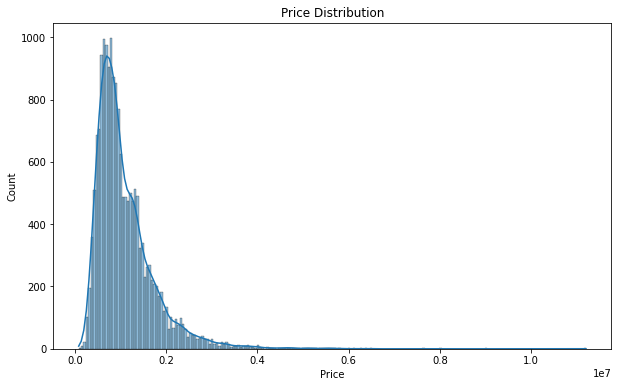

In [108]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

In [109]:
# Calculate percentile values for price
percentiles = [0.25, 0.5, 0.75]
price_percentiles = df['Price'].quantile(percentiles)
print("Price percentiles:")
print(price_percentiles)

Price percentiles:
0.25     660000.0
0.50     918000.0
0.75    1350000.0
Name: Price, dtype: float64


#### Insights
* Price Distribution: Based on the percentiles, price ranges that cover a significant portion of the market, such as the range between the 25th and 75th percentiles that is 
   between 635000 and  1295000 .

#### Investigating the relationship between property type and price to target specific property types:

In [110]:
##Type:
## br - bedroom(s);
## h - house,cottage,villa, semi,terrace;
## u - unit, duplex;
## t - townhouse;
## dev site - development site;
## o res - other residential.'''


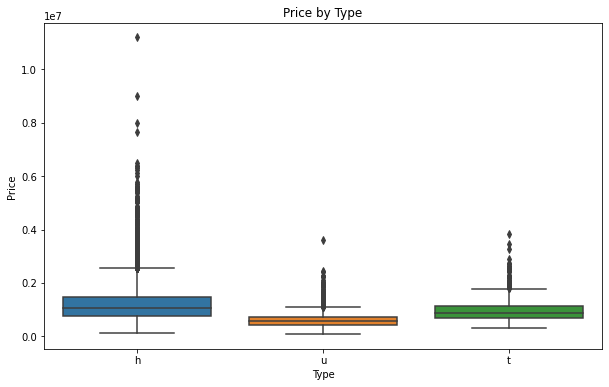

In [111]:
# Boxplot of Price by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Price by Type')
plt.show()

In [112]:
# Calculate average price per property type
avg_price_by_type = df.groupby('Type')['Price'].mean()
print("Average price per property type:")
print(avg_price_by_type)

Average price per property type:
Type
h    1.220679e+06
t    9.443183e+05
u    6.058951e+05
Name: Price, dtype: float64


#### Insights
* Type 'h' means house,cottage,villa, semi,terrace is having average price on higher side than others

### Recommendation
* I can recommend focusing on property types with higher average prices or those with greater price variability to maximize profits.

In [113]:
df.corr()['Price']

Rooms            0.449364
Price            1.000000
Distance        -0.222632
Postcode         0.052795
Bedroom2         0.432903
Bathroom         0.435416
Car              0.201860
Landsize         0.032734
BuildingArea     0.071859
YearBuilt       -0.258968
Lattitude       -0.222873
Longtitude       0.203196
Propertycount   -0.049663
Name: Price, dtype: float64

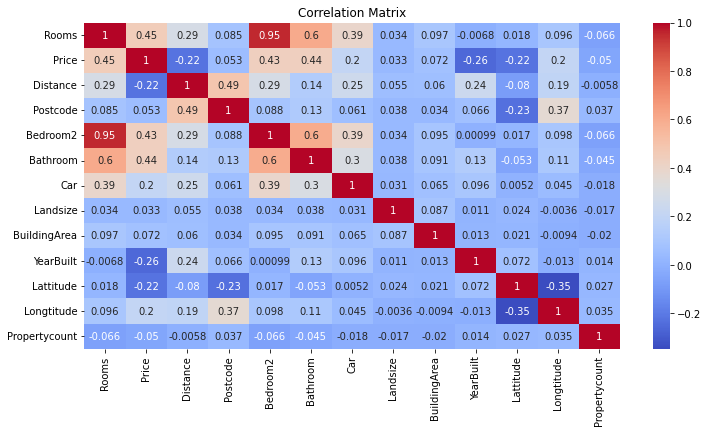

In [114]:
# Visualize the correlation between variables
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


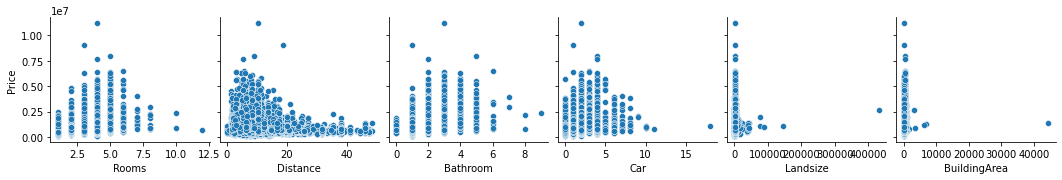

In [115]:
# Visualize the relationship between price and different features
sns.pairplot(df, x_vars=['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea'], y_vars=['Price'],)
plt.show()

### Insights from heatmap and pairplot
* 1.Prices are positively correlated with the number of rooms, bathrooms, and building area.
* 2.Prices are negatively correlated with the distance from the CBD.

### Identifing trends in sales over time, such as seasonal fluctuations, to allocate marketing resources more effectively:

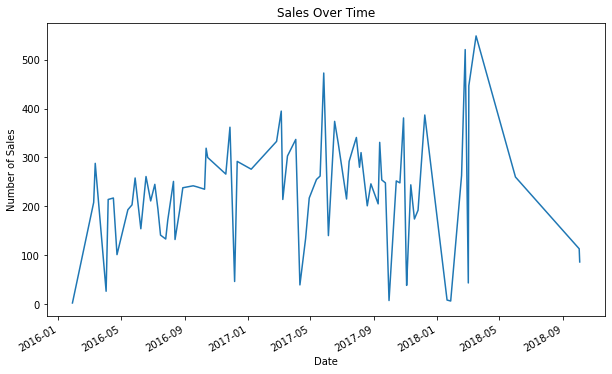

In [116]:
# Sales over time
df['Date'] = pd.to_datetime(df['Date'])
sales_over_time = df.groupby('Date').size()

sales_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()




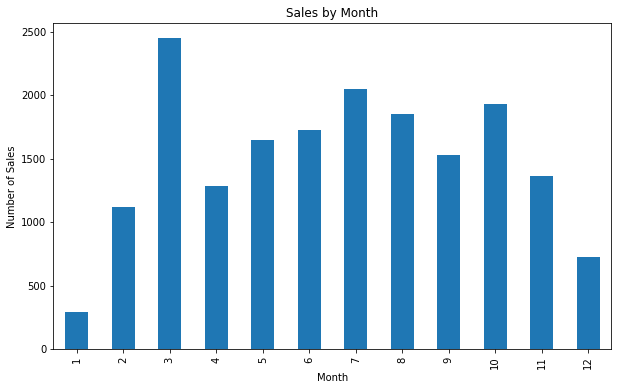

In [117]:
# Sales over time by month
df['Month'] = df['Date'].dt.month
sales_by_month = df.groupby('Month').size()

sales_by_month.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

#### Insights 
* In the month of March, July and October there was a highest sales activity and below that in the months May, June and August the sales is also somewhat on higher side

#### Recommendation

* I recommend allocating more marketing resources during March and October and also from June to September to increase the sales.

### Analyzing the relationship between the number of rooms and price:

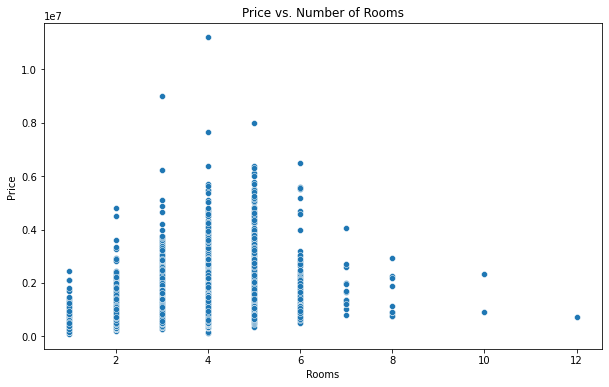

Average price per number of rooms:
Rooms
1     4.390930e+05
2     7.985201e+05
3     1.056583e+06
4     1.389367e+06
5     1.857116e+06
6     1.937099e+06
7     1.775607e+06
8     1.462425e+06
10    1.607500e+06
12    7.100000e+05
Name: Price, dtype: float64


In [118]:
# Scatterplot of Rooms vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rooms', y='Price', data=df)
plt.title('Price vs. Number of Rooms')
plt.show()

# Calculate average price per number of rooms
avg_price_by_rooms = df.groupby('Rooms')['Price'].mean()
print("Average price per number of rooms:")
print(avg_price_by_rooms)


### Insights
* Number of Rooms: The average price increases with the number of rooms.

### Recommendation

* Recommend focusing on properties with more rooms to maximize profits.

### Investigating the relationship between distance from the city center and price:

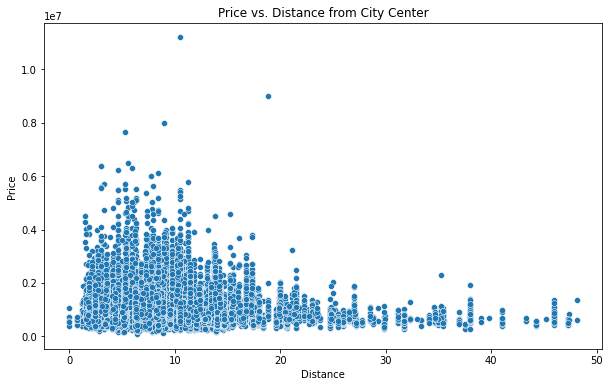

Average price per distance group:
Distance_group
0-5      1.195737e+06
5-10     1.224581e+06
10-15    1.057850e+06
15-20    9.581893e+05
20+      7.307511e+05
Name: Price, dtype: float64


In [119]:
# Scatterplot of Distance vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title('Price vs. Distance from City Center')
plt.show()

# Calculate average price per distance group
df['Distance_group'] = pd.cut(df['Distance'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
avg_price_by_distance = df.groupby('Distance_group')['Price'].mean()
print("Average price per distance group:")
print(avg_price_by_distance)


###  Insight
* Distance from City Center: The average price decreases with increasing distance from the city center,.

### Recommendation
* I could recommend focusing on properties closer to the city center to target higher-priced properties.

### Analyzing the relationship between the year built and price:

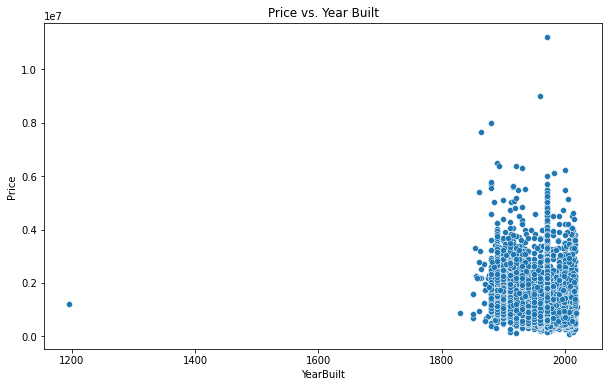

Average price per decade:
Decade
1190.0    1.200000e+06
1830.0    8.550000e+05
1850.0    1.784000e+06
1860.0    3.089500e+06
1870.0    1.510000e+06
1880.0    1.803127e+06
1890.0    1.650701e+06
1900.0    1.464563e+06
1910.0    1.596909e+06
1920.0    1.577985e+06
1930.0    1.534144e+06
1940.0    1.276883e+06
1950.0    1.109539e+06
1960.0    8.964065e+05
1970.0    1.055075e+06
1980.0    9.047015e+05
1990.0    9.738576e+05
2000.0    9.518853e+05
2010.0    9.749180e+05
Name: Price, dtype: float64


In [120]:
# Scatterplot of YearBuilt vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='Price', data=df)
plt.title('Price vs. Year Built')
plt.show()

# Calculate average price per decade
df['Decade'] = (df['YearBuilt'] // 10) * 10
avg_price_by_decade = df.groupby('Decade')['Price'].mean()
print("Average price per decade:")
print(avg_price_by_decade)


### Insights
* Year Built: Newer properties tend to have higher prices, while older properties may have more variability in price.

### Recommendation
* I could recommend targeting newer properties or finding opportunities to renovate older properties to increase their value.

### Analyzing the relationship between the property type and the number of rooms:

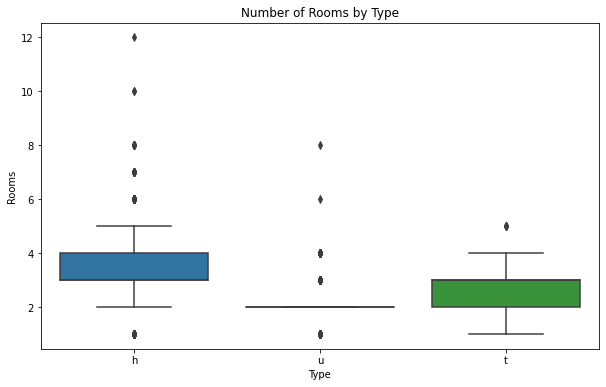

Average number of rooms per property type:
Type
h    3.309631
t    2.868259
u    1.968514
Name: Rooms, dtype: float64


In [121]:
# Boxplot of Rooms by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Rooms', data=df)
plt.title('Number of Rooms by Type')
plt.show()

# Calculate average number of rooms per property type
avg_rooms_by_type = df.groupby('Type')['Rooms'].mean()
print("Average number of rooms per property type:")
print(avg_rooms_by_type)


### Insights
* Number of Rooms by Type: The average number of rooms differs across property types. If the company wants to focus on properties with more rooms, targeting specific property types can be a useful strategy.

### Investigating the relationship between the property type and the distance from the city center:

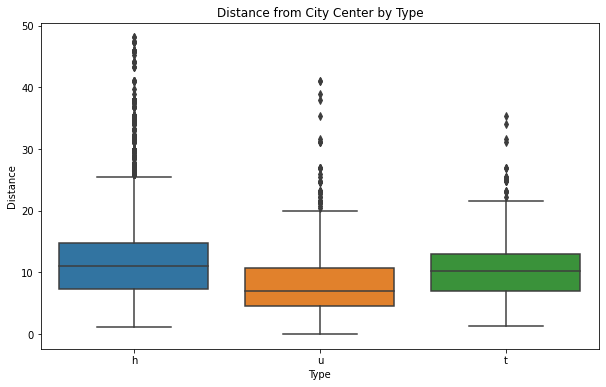

Average distance per property type:
Type
h    11.975134
t    10.124961
u     7.658249
Name: Distance, dtype: float64


In [122]:
# Boxplot of Distance by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Distance', data=df)
plt.title('Distance from City Center by Type')
plt.show()

# Calculate average distance per property type
avg_distance_by_type = df.groupby('Type')['Distance'].mean()
print("Average distance per property type:")
print(avg_distance_by_type)


### Insights
* Distance from City Center by Type: The average distance from the city center varies by property type. The company may want to prioritize certain property types that are typically closer to the city center, as these properties may have higher prices.

### Analyzing the relationship between the property type and the year built:

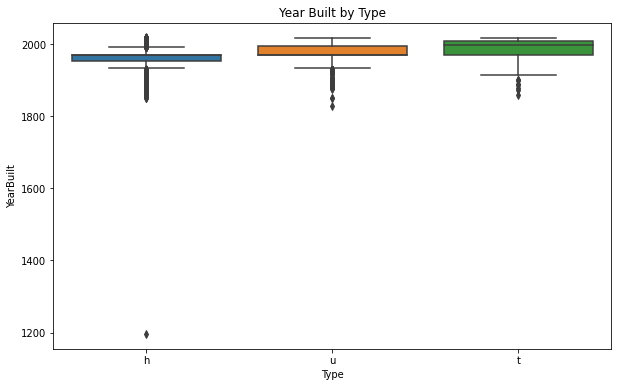

Average year built per property type:
Type
h    1962.909498
t    1989.490755
u    1976.790423
Name: YearBuilt, dtype: float64


In [123]:
# Boxplot of YearBuilt by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='YearBuilt', data=df)
plt.title('Year Built by Type')
plt.show()

# Calculate average year built per property type
avg_year_built_by_type = df.groupby('Type')['YearBuilt'].mean()
print("Average year built per property type:")
print(avg_year_built_by_type)


### Insights
* Year Built by Type: The average year built varies by property type, which may impact the property's price. Focusing on property types that have more recent construction or targeting opportunities to renovate older properties in certain types may help improve sales performance.

## Analyzing sales performance by region:

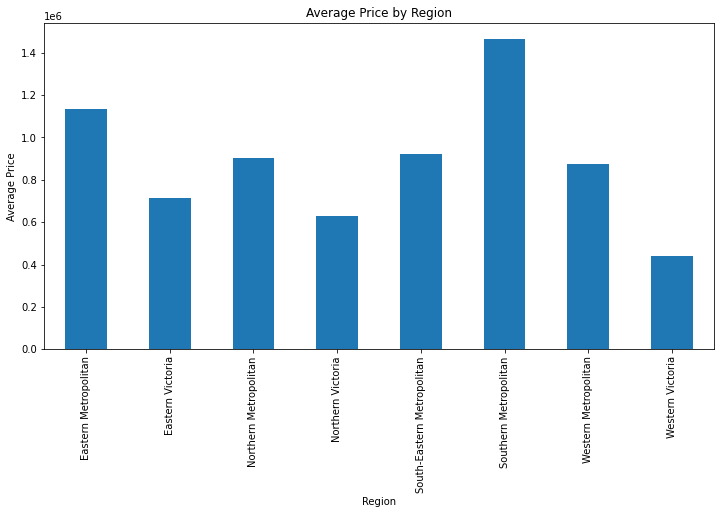

In [124]:
# Group the data by region and calculate the average price for each region
region_mean_price = df.groupby('Regionname')['Price'].mean()

# Visualize the average price by region
plt.figure(figsize=(12, 6))
region_mean_price.plot(kind='bar')
plt.title('Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()


### Insights
* Southern Metropolitan is high-performing region with higher property price. Eastern 
Metropolitan region is also with higher property price.

### Recommendation
* I might recommend focusing sales efforts on these regions to improve overall sales performance.

### Investigating the relationship between the number of bathrooms and price:

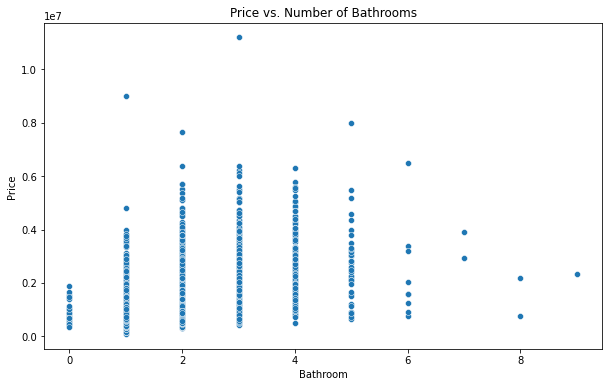

Average price per number of bathrooms:
Bathroom
0.0    8.945588e+05
1.0    8.853285e+05
2.0    1.205429e+06
3.0    1.757296e+06
4.0    2.634263e+06
5.0    2.667488e+06
6.0    2.361222e+06
7.0    3.425000e+06
8.0    1.480000e+06
9.0    2.315000e+06
Name: Price, dtype: float64


In [125]:
# Scatterplot of Bathrooms vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bathroom', y='Price', data=df)
plt.title('Price vs. Number of Bathrooms')
plt.show()

# Calculate average price per number of bathrooms
avg_price_by_bathrooms = df.groupby('Bathroom')['Price'].mean()
print("Average price per number of bathrooms:")
print(avg_price_by_bathrooms)


### Insights
*Number of Bathrooms: The average price tends to increase with the number of bathrooms
### Recommendations 
* so I could recommend focusing on properties with more bathrooms to maximize profits.

### In summary, the insights and recommendations we've derived from the analysis include:
* 1.Focusing on properties with more rooms, bathrooms, and larger building areas.
* 2.Targeting properties closer to the CBD.
* 3.Identifying and targeting high-demand suburbs or regions based on sales volume and price growth.
* 4.Focusing on selling property types with higher average prices.
* 5.Concentrating marketing efforts during periods of high demand.
* 6.Focusing sales efforts on high-performing regions with higher property prices.
* 7.Focusing on properties with more bathrooms to maximize profits.
* 8.Focusing on property types that have more recent construction or targeting opportunities to renovate older properties in certain types may help improve sales performance.
#### For each recommendation, a detailed implementation plan should be developed and included in the final report, along with the insights and visualizations generated during the analysis.








In [126]:
df.to_csv('cleaned_sales_data.csv', index=False)


In [129]:
df=pd .read_csv('cleaned_sales_data.csv')

In [132]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Distance_group,Decade
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,156.834586,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,3,0-5,1970.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,4,0-5,1900.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,4,0-5,1900.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,156.834586,1970.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,4,0-5,1970.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4,0-5,2010.0
